## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
sns.set_style("darkgrid")

conn = sqlite3.connect('zippedData/im.db')

# use below to supress scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# Dylan Orndorf-Ronk

# Alex Bonczkiewicz

# Alberto Torres

# Travis McCloughan

In [3]:
persons = pd.read_sql("""
SELECT *
FROM persons;
""", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,nan,nan,actress
606644,nm9990690,Joo Yeon So,nan,nan,actress
606645,nm9991320,Madeline Smith,nan,nan,actress
606646,nm9991786,Michelle Modigliani,nan,nan,producer


In [4]:
directors = pd.read_sql("""
SELECT *
FROM directors;
""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [5]:
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
ORDER BY numvotes DESC;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt1375666,8.80,1841066
1,tt1345836,8.40,1387769
2,tt0816692,8.60,1299334
3,tt1853728,8.40,1211405
4,tt0848228,8.10,1183655
...,...,...,...
73851,tt8420530,6.80,5
73852,tt8747790,4.60,5
73853,tt9367004,8.20,5
73854,tt9647642,2.00,5


In [6]:
# link directors, persons, and ratings
directors_df = pd.read_sql("""
SELECT p.primary_name, r.averagerating, r.numvotes
FROM persons p
INNER JOIN
    directors d
ON  p.person_id = d.person_id
INNER JOIN
    movie_ratings r
ON  d.movie_id = r.movie_id
WHERE r.numvotes > 750000
GROUP BY p.primary_name
ORDER BY r.averagerating DESC
""", conn)
directors_df

,primary_name,averagerating,numvotes
0,Quentin Tarantino,8.40,1211405
1,Christopher Nolan,8.40,1387769
2,Martin Scorsese,8.10,1005960
3,Joss Whedon,8.10,1183655
4,James Gunn,8.10,948394
5,George Miller,8.10,780910
6,David Fincher,8.10,761592
7,Tim Miller,8.00,820847
8,J.J. Abrams,8.00,784780
9,Gary Ross,7.20,795227


<AxesSubplot:xlabel='averagerating', ylabel='primary_name'>

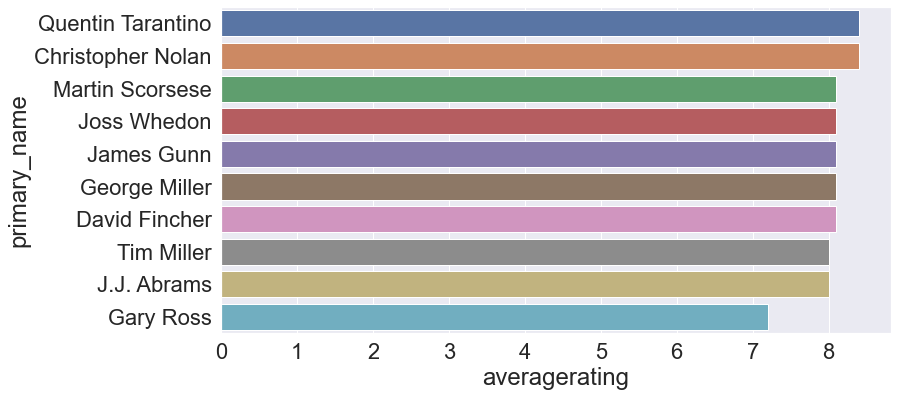

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=2)
sns.barplot(x='averagerating', y='primary_name', data=directors_df)

In [12]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_name   10 non-null     object 
 1   averagerating  10 non-null     float64
 2   numvotes       10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


# Jaemin Lee